<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [4]</a>'.</span>

In [1]:
# Parameters
PRED_CSV = "data/results/regression/regression_predictions_for_ensemble.csv"

In [2]:
# Parameters
PRED_CSV = "/Users/gun/Desktop/\u1106\u1175\u1105\u1162\u110b\u1166\u1109\u1166\u11ba AI \u1100\u1169\u11bc\u1106\u1169\u110c\u1165\u11ab/data/results/regression/regression_predictions_for_ensemble.csv"


/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:244: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:244: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/gun/Desktop/미래에셋 AI 공ᄆ

/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/utils/extmath.py

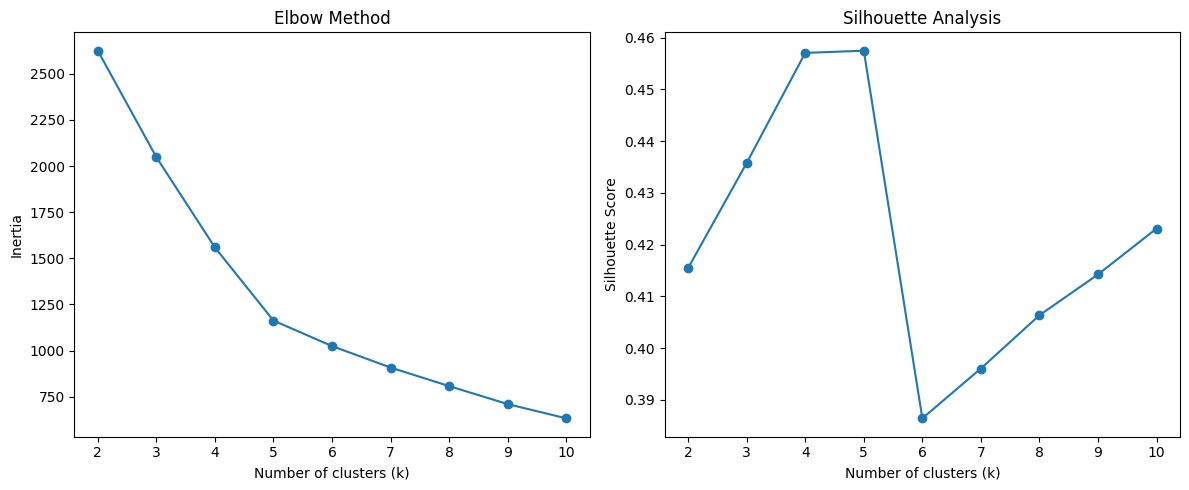

Cluster summary:
    cluster  count  mean_pred  std_pred  mean_residual  std_residual
0        0   1248  -0.007355  0.015655      -0.000261      0.003380
1        1    290   0.031978  0.022343       0.002101      0.004473
2        2     86   0.002587  0.032567      -0.022767      0.010545
3        3     85  -0.007798  0.023960       0.024460      0.011743


/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:244: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:244: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/gun/Desktop/미래에셋 AI 공ᄆ

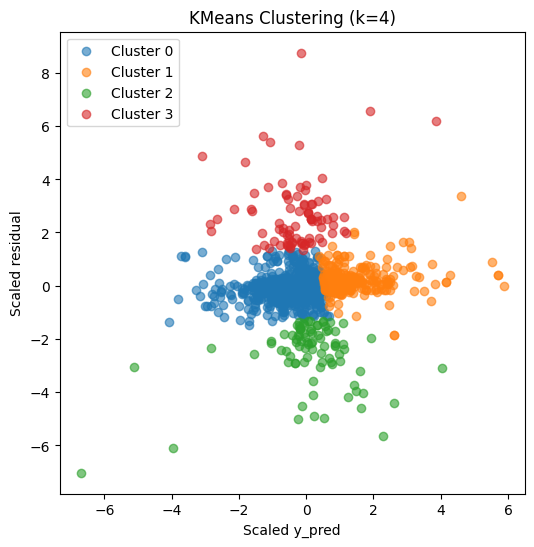

In [3]:
import os
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# ───────────────────────────────────────────────────────────────
# Step 0–1: Load data & select + scale features
FP = PRED_CSV
df = pd.read_csv(FP, parse_dates=["rcept_dt"])

# clustering features: predicted return & residual
features = df[["y_pred", "residual"]].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# ───────────────────────────────────────────────────────────────
# Step 2: k‐optimization (Elbow & Silhouette)
ks = range(2, 11)
inertias = []
sil_scores = []

for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(ks, inertias, "-o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")

plt.subplot(1, 2, 2)
plt.plot(ks, sil_scores, "-o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")

plt.tight_layout()
plt.show()

# ───────────────────────────────────────────────────────────────
# Step 3: KMeans clustering with chosen k
best_k = 4  # ← set this based on the above plots
km = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df["cluster"] = km.fit_predict(X_scaled)

# ───────────────────────────────────────────────────────────────
# Step 4: Cluster‐wise analysis & visualization
summary = df.groupby("cluster").agg(
    count=("cluster", "count"),
    mean_pred=("y_pred", "mean"),
    std_pred=("y_pred", "std"),
    mean_residual=("residual", "mean"),
    std_residual=("residual", "std")
).reset_index()
print("Cluster summary:\n", summary)

plt.figure(figsize=(6, 6))
for c in summary["cluster"]:
    mask = df["cluster"] == c
    plt.scatter(
        X_scaled[mask, 0], X_scaled[mask, 1],
        label=f"Cluster {c}", alpha=0.6
    )

plt.xlabel("Scaled y_pred")
plt.ylabel("Scaled residual")
plt.title(f"KMeans Clustering (k={best_k})")
plt.legend()
plt.show()

<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [4]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# ───────────────────────────────────────────────────────────────
# 1) 경로 설정
BASE_DIR   = "/Users/gun/Desktop/미래에셋 AI 공모전/data"
PRED_CSV   = os.path.join(BASE_DIR, "results", "regression", "regression_predictions_for_ensemble.csv")
OUT_DIR    = os.path.join(BASE_DIR, "results", "clustering")
os.makedirs(OUT_DIR, exist_ok=True)

# ───────────────────────────────────────────────────────────────
# 2) 예측 결과 로드
df = pd.read_csv(PRED_CSV, parse_dates=["rcept_dt"])

# ───────────────────────────────────────────────────────────────
# 3) 클러스터링용 피처 전처리
features = df[["y_pred", "residual"]].values
scaler   = StandardScaler()
X_scaled = scaler.fit_transform(features)

# ───────────────────────────────────────────────────────────────
# 4) KMeans로 클러스터 재생성
best_k = 4  # Elbow/Silhouette 결과에 따라 설정
km     = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df["cluster"] = km.fit_predict(X_scaled)

# ───────────────────────────────────────────────────────────────
# 5) 클러스터별 종목 리스트 저장
for cid, grp in df.groupby("cluster"):
    codes = grp["stock_code"].unique()
    out_fp = os.path.join(OUT_DIR, f"cluster_{cid}_stocks.csv")
    pd.Series(codes, name="stock_code")\
      .to_csv(out_fp, index=False, encoding="utf-8-sig")
    print(f"→ Cluster {cid}: {len(codes)}종목 → {out_fp}")

# ───────────────────────────────────────────────────────────────
# 6) 클러스터별 일별 평균 수익률 → 누적 복리 수익률 계산
daily = df.groupby(["rcept_dt", "cluster"])["y_true"]\
          .mean()\
          .unstack(fill_value=0)\
          .sort_index()
cumret = (1 + daily).cumprod() - 1

# ───────────────────────────────────────────────────────────────
# 7) 누적 수익률 시각화 & 저장
plt.figure(figsize=(10, 6))
for cid in cumret.columns:
    plt.plot(cumret.index, cumret[cid], label=f"Cluster {cid}")
plt.title("Cluster-wise Cumulative Return")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()

chart_fp = os.path.join(OUT_DIR, "cluster_cumulative_returns.png")
plt.savefig(chart_fp)
plt.show()
print(f"✅ 누적 수익률 차트 → {chart_fp}")

/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:244: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/gun/Desktop/미래에셋 AI 공모전/venv_pipeline/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:244: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/gun/Desktop/미래에셋 AI 공ᄆ

→ Cluster 0: 244종목 → /Users/gun/Desktop/미래에셋 AI 공모전/data/results/clustering/cluster_0_stocks.csv
→ Cluster 1: 131종목 → /Users/gun/Desktop/미래에셋 AI 공모전/data/results/clustering/cluster_1_stocks.csv
→ Cluster 2: 43종목 → /Users/gun/Desktop/미래에셋 AI 공모전/data/results/clustering/cluster_2_stocks.csv
→ Cluster 3: 43종목 → /Users/gun/Desktop/미래에셋 AI 공모전/data/results/clustering/cluster_3_stocks.csv


KeyError: 'Column not found: y_true'

In [ ]:
import os
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster      import KMeans
from sklearn.metrics      import silhouette_score
import matplotlib.pyplot  as plt

# ───────────────────────────────────────────────────────────────
# 1) 예측 결과 로드 (parquet으로 저장했다고 가정)
PRED_FP = PRED_CSV.replace(".csv", ".parquet")
df = pd.read_parquet(PRED_FP)

# ───────────────────────────────────────────────────────────────
# 2) 클러스터링에 사용할 피처: 예측값(y_pred)과 잔차(residual)
features = df[["y_pred","residual"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# ───────────────────────────────────────────────────────────────
# 3) 적절한 k 찾기 (Elbow & Silhouette)
ks = range(2, 11)
inertias, sil_scores = [], []

for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(ks, inertias, "-o")
plt.xlabel("Cluster 수 (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")

plt.subplot(1, 2, 2)
plt.plot(ks, sil_scores, "-o")
plt.xlabel("Cluster 수 (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")

plt.tight_layout()
plt.show()

# ───────────────────────────────────────────────────────────────
# 4) 최종 KMeans 실행
BEST_K = 4
km    = KMeans(n_clusters=BEST_K, random_state=42, n_init=10)
df["cluster"] = km.fit_predict(X_scaled)

# ───────────────────────────────────────────────────────────────
# 5) 클러스터 요약 & 시각화
summary = df.groupby("cluster").agg(
    count           = ("cluster", "count"),
    mean_pred       = ("y_pred", "mean"),
    std_pred        = ("y_pred", "std"),
    mean_residual   = ("residual", "mean"),
    std_residual    = ("residual", "std"),
).reset_index()
print("Cluster summary:\n", summary)

plt.figure(figsize=(6, 6))
for c in summary["cluster"]:
    plt.scatter(
        X_scaled[df["cluster"]==c, 0],
        X_scaled[df["cluster"]==c, 1],
        label=f"Cluster {c}", alpha=0.6
    )
plt.xlabel("Scaled y_pred")
plt.ylabel("Scaled residual")
plt.title(f"KMeans Clustering (k={BEST_K})")
plt.legend()
plt.show()